In [1]:
import pandas as pd
import numpy as np

In [2]:
dataframe = pd.read_csv("data/power_nasa.csv")
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7761 entries, 0 to 7760
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    7761 non-null   int64  
 1   DOY     7761 non-null   int64  
 2   T2M     7761 non-null   float64
 3   PS      7761 non-null   float64
 4   WS2M    7761 non-null   float64
 5   WD2M    7761 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 363.9 KB


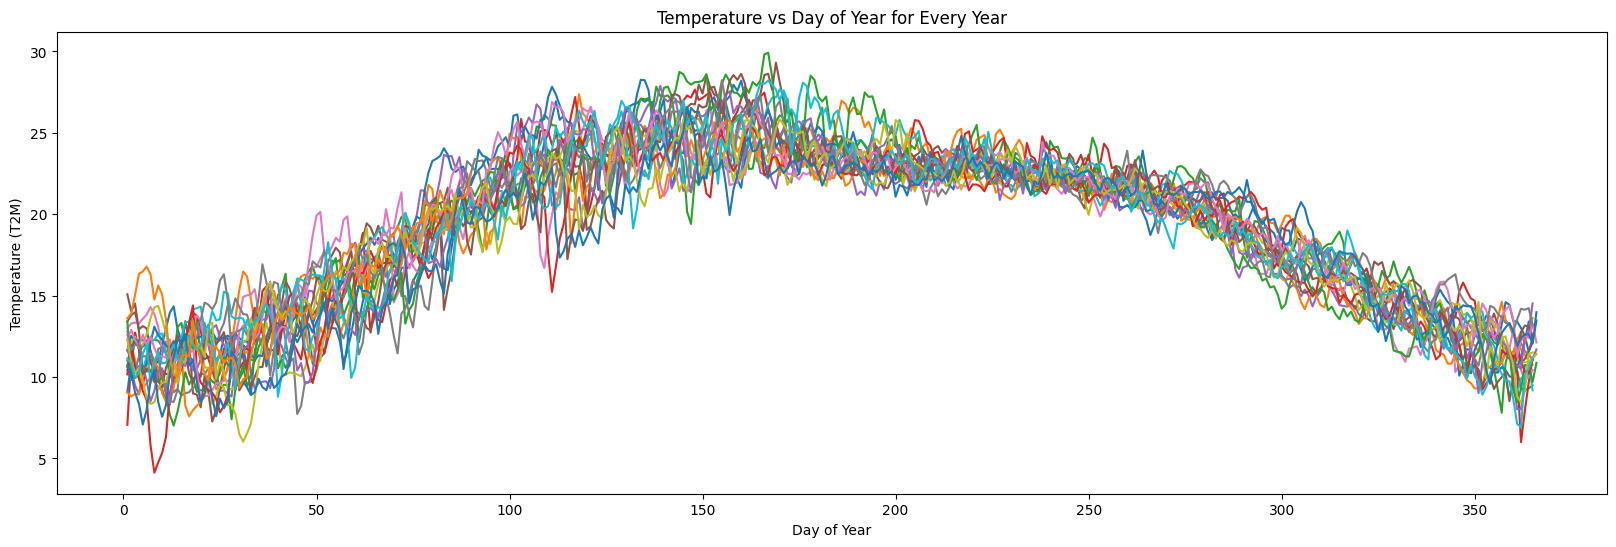

In [3]:
import matplotlib.pyplot as plt

# Group the dataframe by year
grouped_df = dataframe.groupby('YEAR')

plt.figure(figsize=(20, 6))
# Plot the graph for each year
for year, group in grouped_df:
    plt.plot(group['DOY'], group['T2M'], label=str(year))

# Set the labels and title
plt.xlabel('Day of Year')
plt.ylabel('Temperature (T2M)')
plt.title('Temperature vs Day of Year for Every Year')

# Show the plot
plt.show()


      YEAR  DOY    T2M     PS  WS2M    WD2M
7305  2020    1  10.66  88.13  0.74  127.38
7306  2020    2  10.26  88.21  1.15   86.50
7307  2020    3   9.04  87.88  1.18   81.12
7308  2020    4   8.35  87.64  1.08  171.88
7309  2020    5   7.08  87.55  1.45  281.50
...    ...  ...    ...    ...   ...     ...
7666  2020  362  12.39  87.52  1.16  131.38
7667  2020  363  12.60  87.50  1.28  223.00
7668  2020  364  12.63  87.57  1.23  216.62
7669  2020  365  12.05  87.71  1.26  194.81
7670  2020  366  13.47  87.71  1.30  256.12

[366 rows x 6 columns]


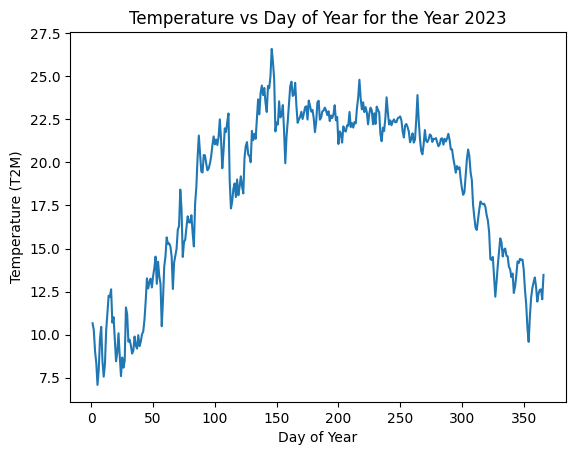

In [4]:
import matplotlib.pyplot as plt

# Filter the dataframe for the year 2023
year_2023_df = dataframe[dataframe['YEAR'] == 2020]

print(year_2023_df)
# Plot the temperature values
plt.plot(year_2023_df['DOY'], year_2023_df['T2M'])
plt.xlabel('Day of Year')
plt.ylabel('Temperature (T2M)')
plt.title('Temperature vs Day of Year for the Year 2023')
plt.show()


          YEAR       DOY       T2M        PS      WS2M      WD2M
YEAR  1.000000 -0.026711 -0.033102  0.049412 -0.036853  0.109237
DOY  -0.026711  1.000000  0.066271  0.028599 -0.493166 -0.063998
T2M  -0.033102  0.066271  1.000000 -0.747942  0.428866 -0.299955
PS    0.049412  0.028599 -0.747942  1.000000 -0.402163  0.163894
WS2M -0.036853 -0.493166  0.428866 -0.402163  1.000000  0.054504
WD2M  0.109237 -0.063998 -0.299955  0.163894  0.054504  1.000000


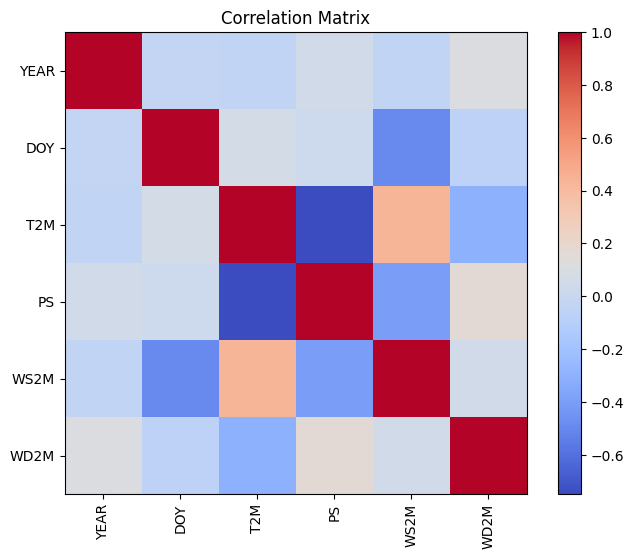

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the correlation matrix is stored in the variable 'correlation_matrix'
# You can replace it with the actual variable name in your notebook

correlation_matrix = dataframe.corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()


In [8]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named df
df = dataframe.copy()

# Convert the date columns to a datetime object (if not already done)
df['DATE'] = pd.to_datetime(df[['YEAR', 'DOY']].astype(str).apply('-'.join, 1), format='%Y-%j')
df.set_index('DATE', inplace=True)

# Drop unnecessary columns for forecasting
df.drop(columns=['YEAR', 'DOY'], inplace=True)

# Check the dataframe
print(df.head())


              T2M     PS  WS2M    WD2M
DATE                                  
2000-01-01  11.63  87.67  1.25  231.12
2000-01-02  12.53  87.63  1.24  253.06
2000-01-03  12.20  87.50  1.27  214.50
2000-01-04  11.74  87.48  1.28  274.38
2000-01-05  11.87  87.54  1.34  293.31


In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define the model
model = SARIMAX(df['T2M'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Fit the model
model_fit = model.fit(disp=True)

# Forecast for the next 30 days
forecast = model_fit.forecast(steps=30)
forecast_dates = pd.date_range(start=df.index[-1], periods=31, closed='right')

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(df['T2M'], label='Actual Temperature')
plt.plot(forecast_dates, forecast, label='Forecasted Temperature', color='red')
plt.legend()
plt.show()

# Evaluate the model
y_true = df['T2M'][-30:]  # assuming we have the actual data for the last 30 days
y_pred = forecast[:30]
mse = mean_squared_error(y_true, y_pred)
print(f'Mean Squared Error: {mse}')


c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


TypeError: DatetimeArray._generate_range() got an unexpected keyword argument 'closed'

49/49 [==============================] - 1s 23ms/step


ValueError: x and y must have same first dimension, but have shapes (1479,) and (1540, 1)

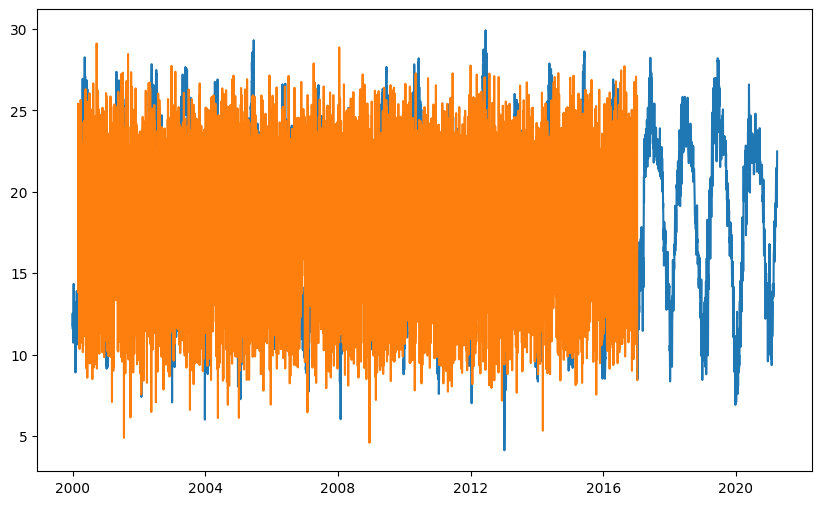

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df["T2M"].values.reshape(-1, 1))

# Prepare the data for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

# Define the time step
time_step = 60

# Create the dataset
X, Y = create_dataset(scaled_data, time_step)

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Reshape the data to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, batch_size=1, epochs=1)

# Predicting and plotting the results
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['T2M'], label='Actual Temperature')
plt.plot(df.index[time_step:len(train_predict)+time_step], train_predict, label='Train Predictions')
plt.plot(df.index[len(train_predict)+(time_step*2)+1:len(df)-1], test_predict, label='Test Predictions')
plt.legend()
plt.show()

# Evaluate the model
mse = mean_squared_error(Y_test, test_predict)
print(f'Mean Squared Error: {mse}')
